# **Análise exploratória do Dataset "Black friday sales**"
Disponível em: https://www.kaggle.com/datasets/rajeshrampure/black-friday-sale

Grupo 1: Alessa, Beatriz, Guilherme, João, Thais e Thiago

In [ ]:
# #código para importar um arquivo do computador
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1. Apresentação do Dataset**

 **Descrição dos dados:**

* Variable - Definição
* User_ID - User ID
* Product_ID - Product ID
* Gender - Sexo do usuário
* Age - Idade
* Occupation - Ocupação (Masked)
* City_Category - Categoria da cidades (A, B, C)
* Stay_In_Current_City_Years - Anos de permanência na cidade atual
* Marital_Status - Estado civil
* Product_Category_1 - Categoria do produto (Masked)
* Product_Category_2 - O produto pode pertencer a outras categorias também (Masked)
* Product_Category_3 - O produto pode pertencer a outras categorias também (Masked)
* Purchase - Valor da compra (Variável) 



In [ ]:
#definição do dataframe:
df = pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Dimensões:
df.shape

(550068, 12)

In [ ]:
#As informações armazenadas são divididas nas seguintes categorias:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# observação dos valores nulos por coluna
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
dtype: float64

<AxesSubplot:title={'center':'Valores nulos por coluna'}>

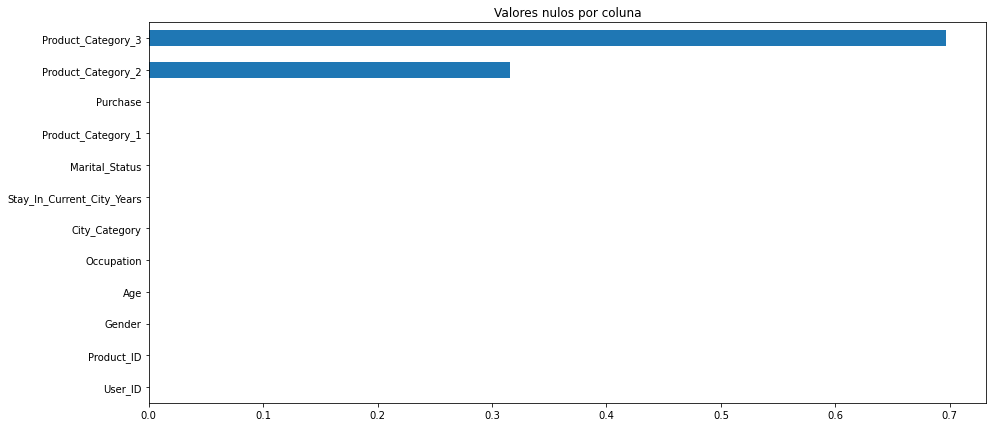

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True).plot(kind = 'barh',
                                                                   title = 'Valores nulos por coluna',
                                                                   ylabel = '', figsize=(15,7))

**Observando os dados:**

In [ ]:
#Gêneros presentes no dataset:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [ ]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [ ]:
Ticket_med = round((df["Purchase"].sum()/df.shape[0]),2)
Ticket_med

9263.97

# **2. Processamento dos dados**

In [ ]:
# As únicas colunas que apresentam valores nulos são "Product_Category_2" e "Product_Category_3" 
# Essas colunas possuem valores mascarados, além de já possuir uma coluna "Product_Category_1" sem valores nulos 
# Foi decidido remover-las por não serem necessárias para as análises

In [ ]:
df = df.drop(["Product_Category_2","Product_Category_3"], axis= 1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


<AxesSubplot:>

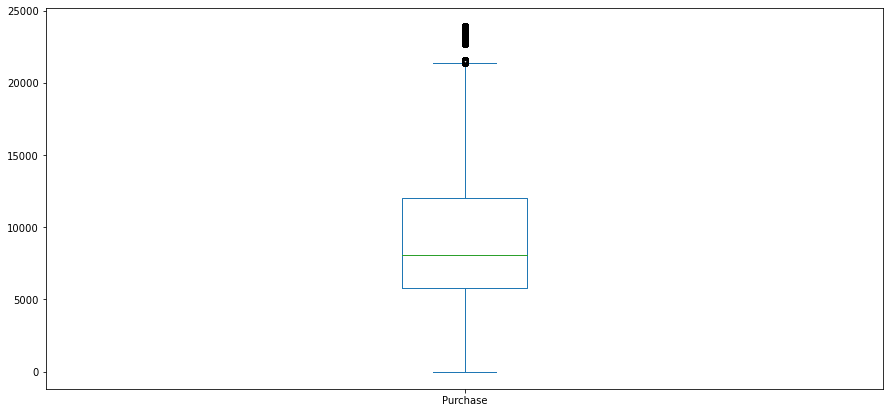

In [ ]:
# Vamos analisar como os outliers se comportam
df.Purchase.plot(kind = "box", figsize=(15,7))

In [ ]:
# O dataset apresenta outliers apenas na parte superior
# Vamos utilizar o modelo de cálculo com base nos quartils

In [ ]:
q1 = df.Purchase.quantile(0.25)
q3 = df.Purchase.quantile(0.75)
iqr = q3-q1
out_sup = q3+1.5*iqr
out_sup

21400.5

In [ ]:
# Valores a partir de 21400.5 são considerados outliers

In [ ]:
outliers = df[df['Purchase'] > out_sup]
outliers.shape

(2677, 10)

In [ ]:
outliers.Purchase.describe()

count     2677.000000
mean     23238.392230
std        701.671127
min      21401.000000
25%      23154.000000
50%      23418.000000
75%      23684.000000
max      23961.000000
Name: Purchase, dtype: float64

In [ ]:
# Temos 2677 valores como outliers

In [ ]:
outliers_porcentagem = (outliers.Purchase.count()/df.Purchase.count())*100
outliers_porcentagem

0.4866671029763593

In [ ]:
# Os outliers representam menos de 0.5% do dataset

In [ ]:
df.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
not_outliers = df[df['Purchase'] < out_sup]
not_outliers.Purchase.describe()

count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64

In [ ]:
# A média e o desvio padrão do dataset não possui diferenças tão grandes comparadas aos valores filtrados sem os outliers

In [ ]:
outliers.Purchase.min() - not_outliers.Purchase.max()

2

In [ ]:
outliers.Purchase.max() - not_outliers.Purchase.max()

2562

In [ ]:
# os valores máximo e mínimo dos ouliers não apresentam valores tão discrepantes do valor máximo dos valores considerados não outliers

In [ ]:
# A partir dessas informações, foi decidido que os outliers não possuem grande influência na apuração dos dados, por isso, eles não serão retirados da análise.

## Análise das colunas do dataset:

#### USER_ID

In [ ]:
# Quando pegamos aleatoriamente um usuário específico podemos perceber que temos congruência de valores de cadastro.
df[df['User_ID'] == 1006035][['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
39119,1006035,F,26-35,1,C,3,0


In [ ]:
# Quantidade de usuários diferentes no dataset. O que significa que muitos deles compraram mais de uma vez dentro desse período de análise.
df.User_ID.drop_duplicates().count()

5891

In [ ]:
# Esse é o dado mais exato da quantidade de vezes em que cada usuário efetuou uma compra.
df.User_ID.value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
# Quantidade média de compras por usuário.
df.size / df.User_ID.drop_duplicates().count()

933.742997793244

In [ ]:
# Gasto médio por usuário
df.Purchase.sum() / df.User_ID.drop_duplicates().count()

865016.5917501273

<AxesSubplot:>

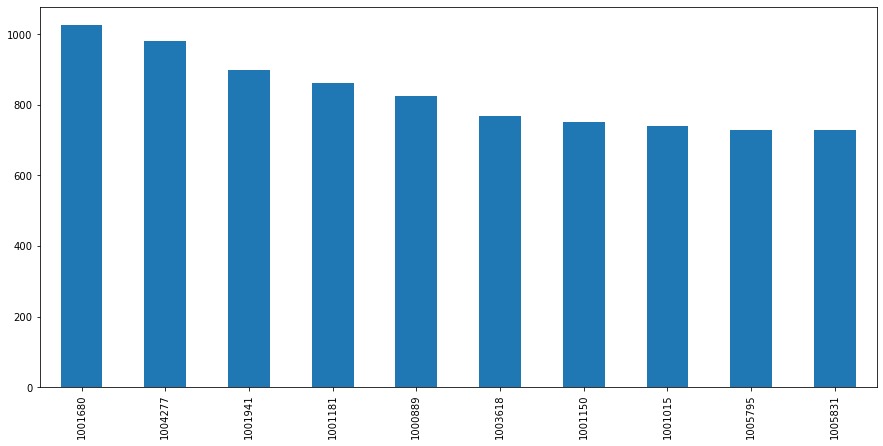

In [ ]:
# Gráfico de frequência dos 10 primeiros usuários que mais compraram nesse período.
df.User_ID.value_counts().head(10).plot(kind = 'bar', figsize = (15, 7))

#### PRODUCT_ID

In [ ]:
# Quantidade de produtos diferentes no dataset. Significa que cada produto pode ter sido vendido mais de uma vez.
qtd_produtos = df.Product_ID.drop_duplicates().count()
qtd_produtos

3631

In [ ]:
# Aqui conseguimos ver a quantidade de vezes em que cada produto foi comprado.
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# Quando pegamos um produto específico para analisar, podemos ver que um mesmo produto possui vários valores de compra diferentes. 
# O que demonstra uma inconsistencia. 
# Porém, não há incongruência de cadastro de produto, uma vez que o mesmo produto possui sempre a mesma categoria.
df[df['Product_ID'] == 'P00069042'][['Product_ID', 'Product_Category_1', 'Purchase']]

,Product_ID,Product_Category_1,Purchase
0,P00069042,3,8370
825,P00069042,3,10715
3314,P00069042,3,11037
4224,P00069042,3,8009
5864,P00069042,3,13346
...,...,...,...
539484,P00069042,3,13483
540849,P00069042,3,10895
543419,P00069042,3,11047
544454,P00069042,3,13557


<AxesSubplot:xlabel='Product_ID'>

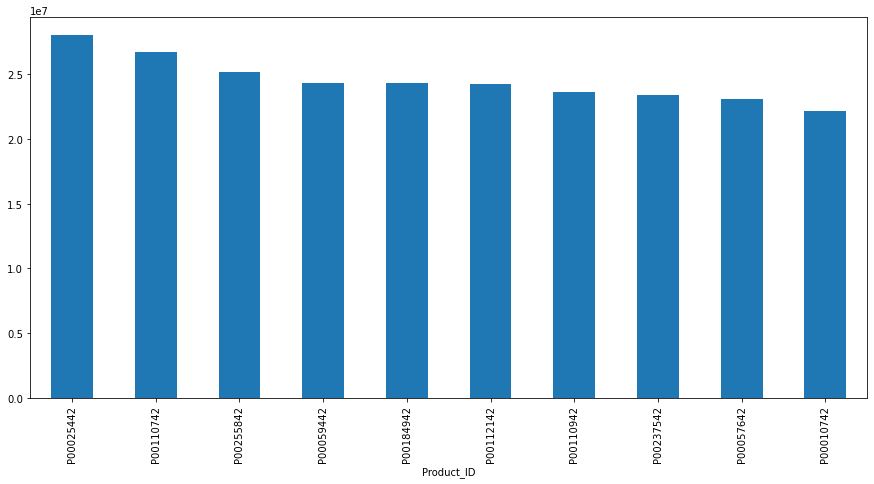

In [ ]:
# Esse plot mostra o agrupamento de valor gasto por cada produto.
df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize=(15, 7))

In [ ]:
# Quando comparamos com a quantidade de valores únicos para o "Purchase", 
# os números não batem com os valores únicos para "Product_ID".
df.Purchase.drop_duplicates()

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
546518      249
546553      607
546672      135
546691      123
546813      613
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
# Aqui podemos ver a quantidade de produtos vendidos divididos por categoria. 
df.groupby('Product_Category_1')['Product_ID'].size()

Product_Category_1
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_ID, dtype: int64

In [ ]:
# Aqui podemos ver a quantidade de produtos cadastrados por categoria.
info_produtos = df[['Product_ID', 'Product_Category_1']].drop_duplicates()
info_produtos.groupby('Product_Category_1')['Product_ID'].count()

Product_Category_1
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

# **3. Análise Exploratória**

In [ ]:
# Categorias dos produtos
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

<AxesSubplot:xlabel='Categoria produtos', ylabel='Faturamento'>

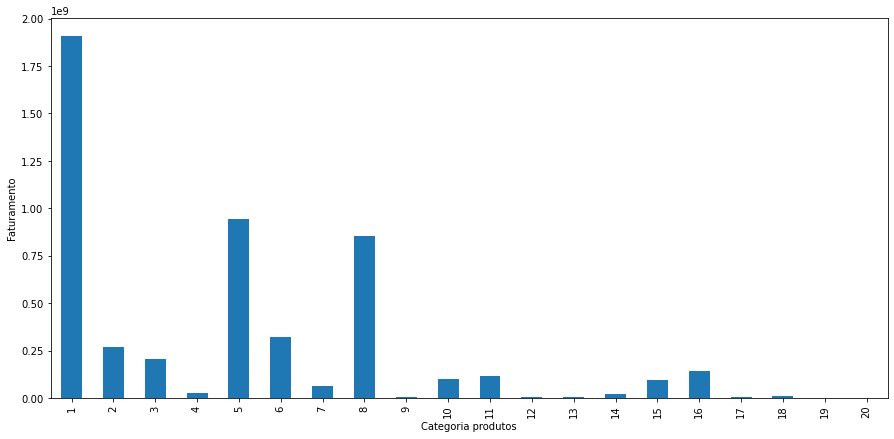

In [ ]:
# Faturamento por categoria de produtos
#df.rename(columns = {'Product_Category_1': 'Categoria produtos', 'Purchase': 'Faturamento'}, inplace = True)
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar',  
                                                        xlabel= 'Categoria produtos',
                                                        ylabel= 'Faturamento',
                                                        figsize= (15, 7))

<AxesSubplot:xlabel='Idade', ylabel='Faturamento'>

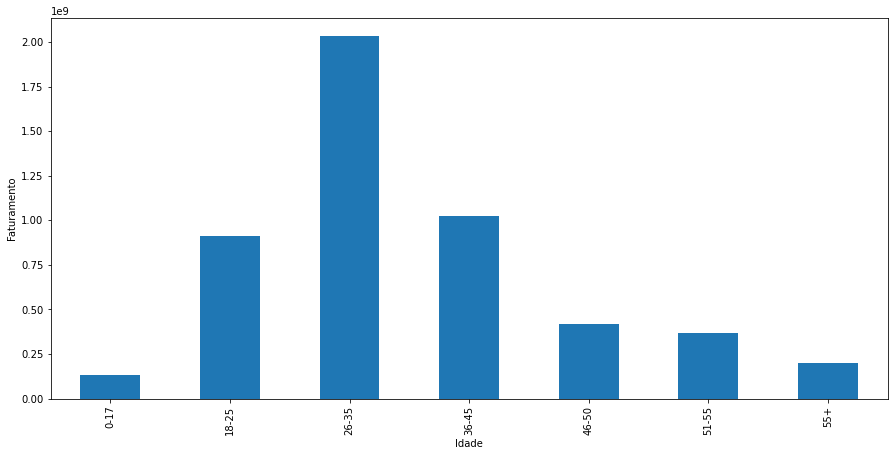

In [ ]:
# Faturamento por idade
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',
                                         xlabel= 'Idade',
                                         ylabel= 'Faturamento',
                                         figsize=(15, 7))

<AxesSubplot:ylabel='Idade e cidade'>

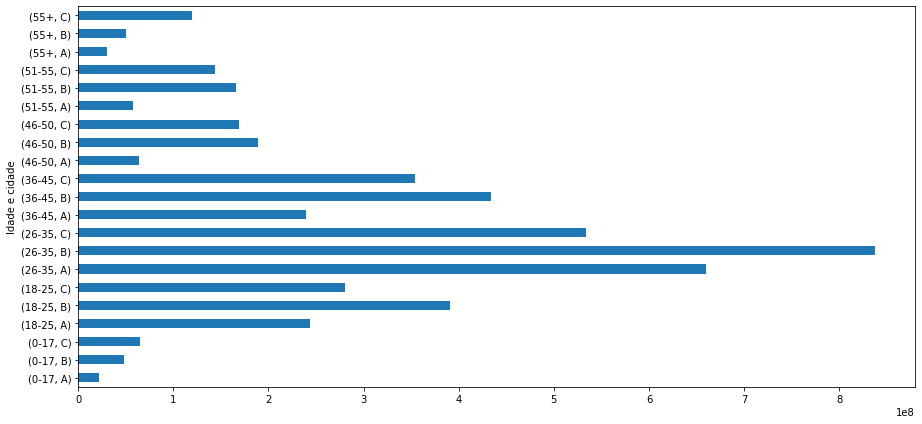

In [ ]:
# Faturamento por idade e cidade
df.groupby(['Age', 'City_Category'])['Purchase'].sum().plot(kind = 'barh',
                                                            xlabel='Idade e cidade',
                                                            ylabel='Faturamento',
                                                            figsize=(15,7))

**Solteiros compram mais?**

<AxesSubplot:xlabel='Estado civil', ylabel='Faturamento'>

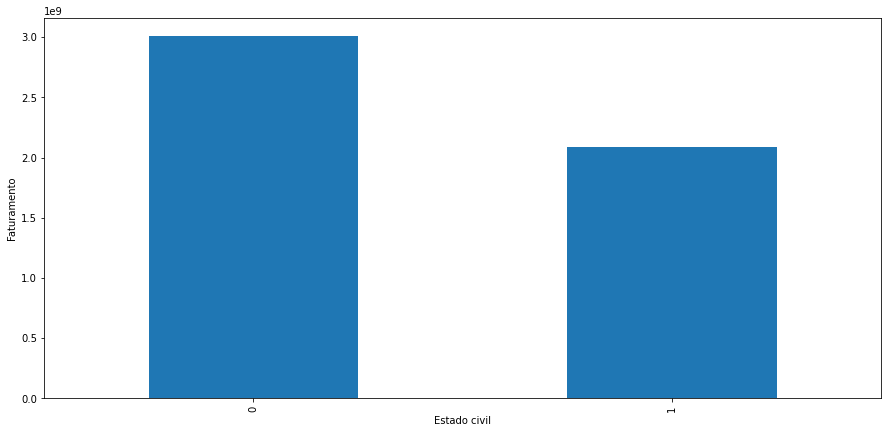

In [ ]:
# Faturamento por estado civil 
df.groupby('Marital_Status')['Purchase'].sum().plot(kind = 'bar',
                                                    xlabel='Estado civil',
                                                    ylabel='Faturamento',
                                                    figsize=(15,7))

In [ ]:
# Faturamento por estado civil e genero
df.groupby(['Marital_Status', 'Gender'])['Purchase'].sum()

Marital_Status  Gender
0               F          684154127
                M         2324773320
1               F          502078515
                M         1584806780
Name: Purchase, dtype: int64

<AxesSubplot:xlabel='Estado civil e genero', ylabel='Faturamento'>

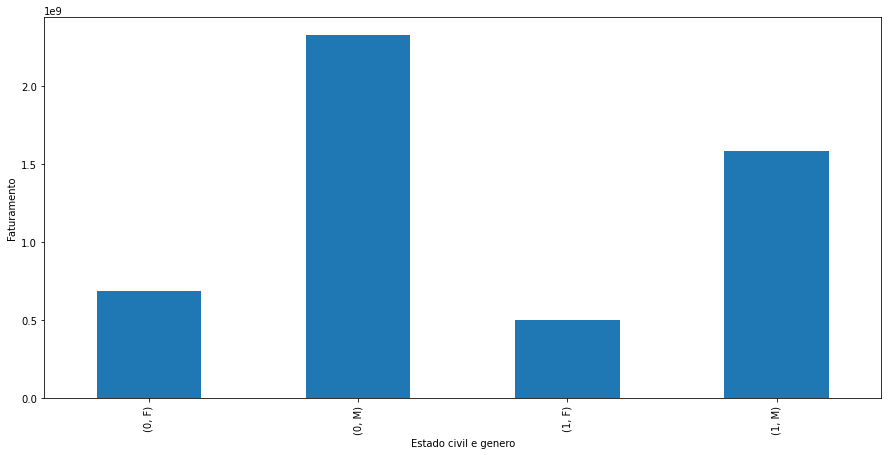

In [ ]:
df.groupby(['Marital_Status', 'Gender'])['Purchase'].sum().plot(kind = 'bar',
                                                    xlabel='Estado civil e genero',
                                                    ylabel='Faturamento',
                                                    figsize=(15,7))

**Análise dos produtos (product_id)**

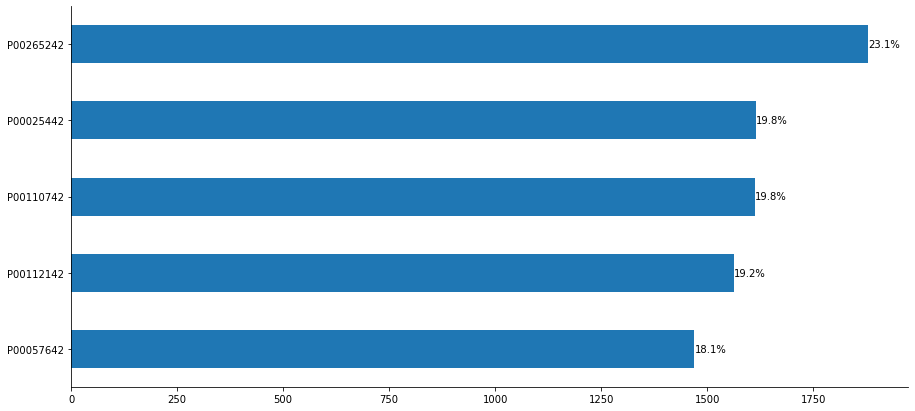

In [ ]:
# produtos mais vendidos
produtos_mais_vendidos = df.Product_ID.value_counts()
grafico_legendado = produtos_mais_vendidos.head().sort_values(ascending=True).plot(kind = 'barh', figsize=(15,7))
labels = [str(round(x / grafico_legendado.containers[0].datavalues.sum() * 100, 1)) + '%' for x in grafico_legendado.containers[0].datavalues]
plt.bar_label(grafico_legendado.containers[0], labels);
grafico_legendado.spines['top'].set_visible(False)
grafico_legendado.spines['right'].set_visible(False)

<AxesSubplot:ylabel='Faturamento'>

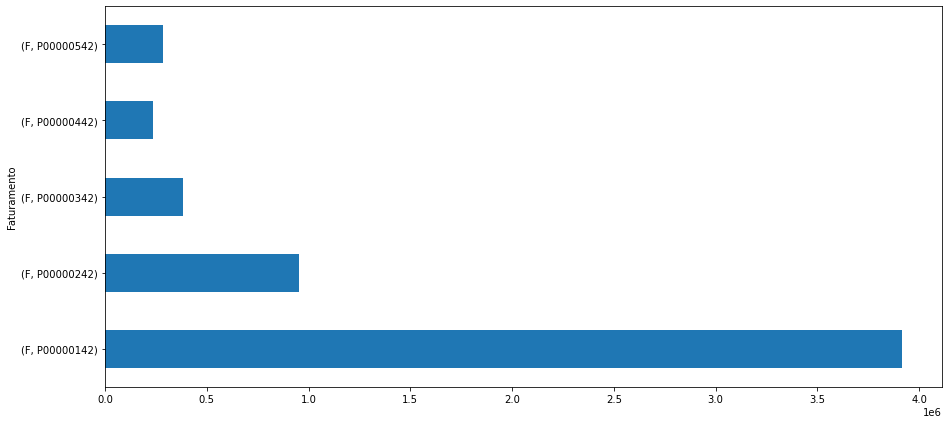

In [ ]:
# Faturamento por produto e por genero
df.groupby(['Gender', 'Product_ID'])['Purchase'].sum().head().plot(kind = 'barh',
                                                    xlabel='Faturamento',
                                                    ylabel='Genero e produto',
                                                    figsize=(15,7))

<AxesSubplot:xlabel='Product_ID'>

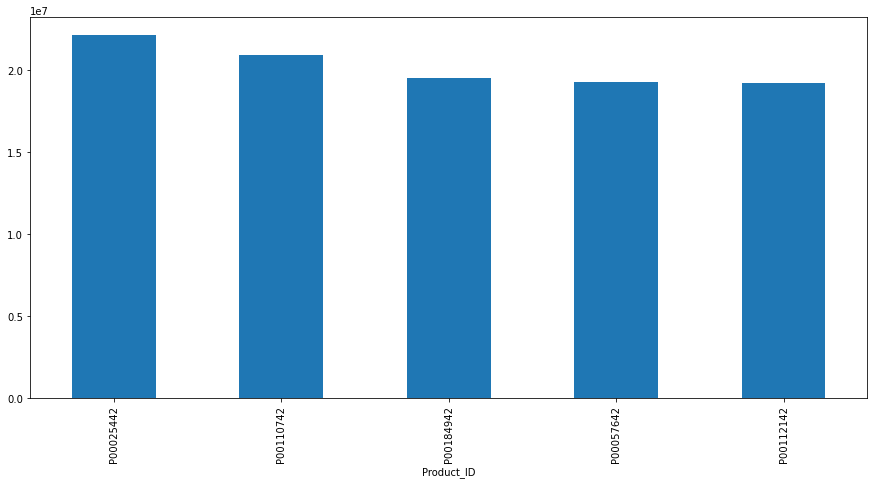

In [ ]:
# Faturamento do genero masculino por produto
df[df['Gender'] == 'M'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head().plot(kind = 'bar', figsize=(15,7) )
                                                                                                        #  xlabel='Produto',
                                                                                                        #  ylabel='Faturamento')

<AxesSubplot:xlabel='Product_ID'>

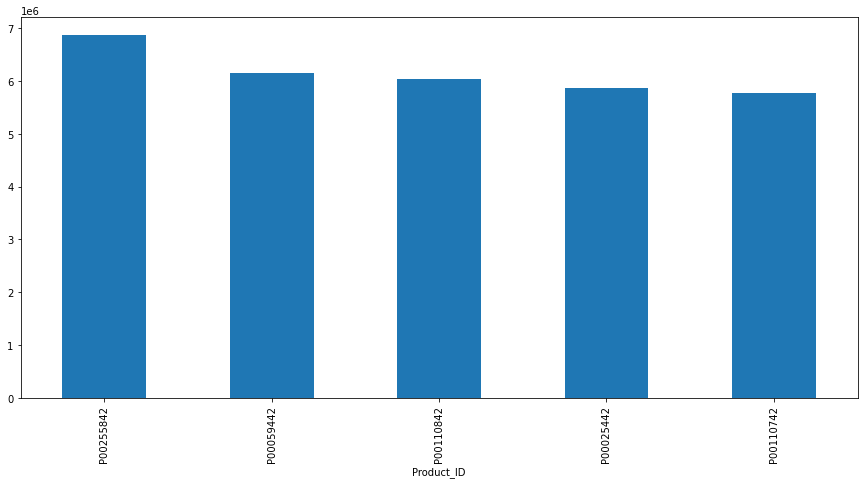

In [ ]:
# Faturramento do genero feminino por poduto
df[df['Gender'] == 'F'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head().plot(kind = 'bar', figsize=(15,7))
                                                                                                        #  xlabel='Produto',
                                                                                                        #  ylabel='Faturamento')

In [ ]:
# Definindo faturamento do genero feminino e masculino por poduto
faturamento_fem = df[df['Gender'] == 'F'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head()
faturamento_masc = df[df['Gender'] == 'M'].groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head()

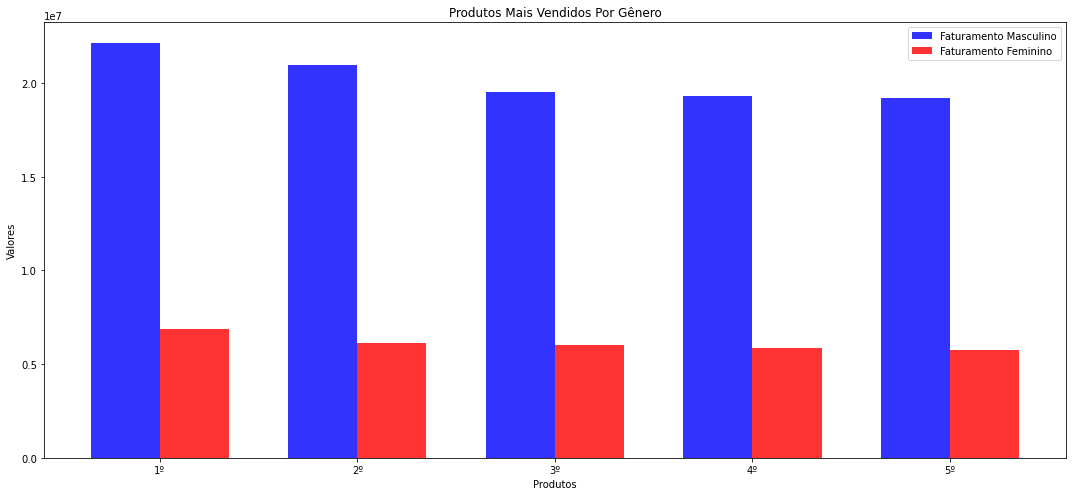

In [ ]:
# Dados para o primeiro gráfico de barra
dados1 = faturamento_masc.values
labels1 = ['1º', '2º', '3º', '4º', '5º']

# Dados para o segundo gráfico de barra
dados2 = faturamento_fem.values
labels2 = ['1º', '2º', '3º', '4º', '5º']

# Configurações para o primeiro gráfico de barra
index = np.arange(len(labels1))
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(index, dados1, bar_width, alpha=opacity, color='b', label='Faturamento Masculino')

# Configurações para o segundo gráfico de barra
index2 = np.arange(len(labels2)) + bar_width
rects2 = ax.bar(index2, dados2, bar_width, alpha=opacity, color='r', label='Faturamento Feminino')

ax.set_xlabel('Produtos')
ax.set_ylabel('Valores')
ax.set_title('Produtos Mais Vendidos Por Gênero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels1)
ax.legend()

plt.tight_layout()
plt.show()

# **4. Conclusões**


* Solteiros compram mais
* Homens compram mais que mulheres
* O maior faturamento foram dos produtos da categoria 1
* Pessoas com idade entre 26 - 35 anos compram mais
* Cidade com mais compras é a B
* O produto que mais foi vendido: P00265242 com 23.1% das vendas